# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


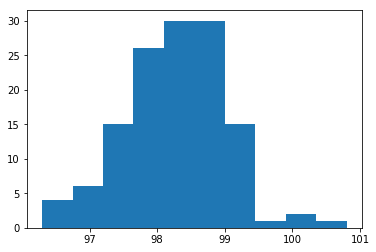

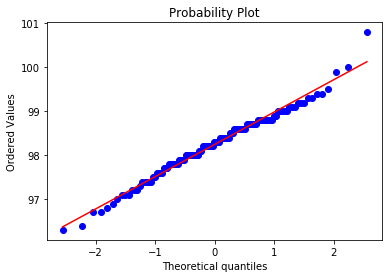

In [15]:
# checking normality 
body_temps = df['temperature']
plt.hist(body_temps)
plt.show()
stats.probplot(df['temperature'], dist="norm", plot=pylab)
pylab.show()





In [ ]:
Appears to follow a fairly normal distribution. Tails at the end. 

In [35]:
# Question 2 and 3
# check size of sample 
print(len(df.temperature))
# >30 so accepted as large enough under CLT
# check sample mean
print(df.temperature.mean())
# formulate hypothesis - h0: mean is 98.6 h1: mean is not 98.6 
from statsmodels.stats.weightstats import ztest 
print(ztest(df.temperature, value=98.6))
print(stats.ttest_1samp(df.temperature, 98.6))

130
98.24923076923078
(-5.4548232923645195, 4.9021570141012155e-08)
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


p-values are very small for both, can reject the null hypothesis - mean is not 98.6, there is not a significant difference in the results

In [33]:
# Question 4
z_sample = np.random.choice(df.temperature, size=10)
t_sample = np.random.choice(df.temperature, size=10)
print(ztest(z_sample, value=98.6))
print(stats.ttest_1samp(t_sample, 98.6))


(-2.0097872063804196, 0.044453715423849946)
Ttest_1sampResult(statistic=-2.7264348697476715, pvalue=0.023360453800628282)


t-test provides a much higher p-value than the z-test -- z-test provides a more desirable result.



In [34]:
# Question 5
# calculate 95% confidence interval 
moe = 1.96 * df.temperature.std()/np.sqrt(len(df.temperature))
ci = [df.temperature.mean()-moe, df.temperature.mean()+moe]
ci

[98.123194112228518, 98.375267426233037]

above 98.3752 or below 98.1231 -- temperature is considered abnormal

In [32]:
# Question 6
# create 2 seperate samples
f_temp = np.array(df.temperature[df.gender=='F'])
m_temp = np.array(df.temperature[df.gender=='M'])
# check size 
print(len(m_temp))
print(len(f_temp))

65
65


h0: no difference in female and male temperature, h1: difference in temperature

In [31]:
# 2 sample t test
stats.ttest_ind(f_temp,m_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

p-value <.05 -- there is no significant difference in normal temperature between males and 
females